In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
ds=pd.read_csv('spam.csv',encoding='windows-1252')

In [3]:
ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
ds.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
ds.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [7]:
ds.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
ds.shape

(5572, 5)

In [9]:
# Checking the Null Values
ds.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
ds.duplicated().sum()

403

In [11]:
# Remove Duolicates value from Dataset
ds = ds.drop_duplicates().reset_index(drop=True)

In [12]:
encoding = LabelEncoder()
ds['v1'] = encoding.fit_transform(ds['v1'])
ds

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5165,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5166,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5167,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [13]:
#Counts for Check Spam and Ham mail counting
ds['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

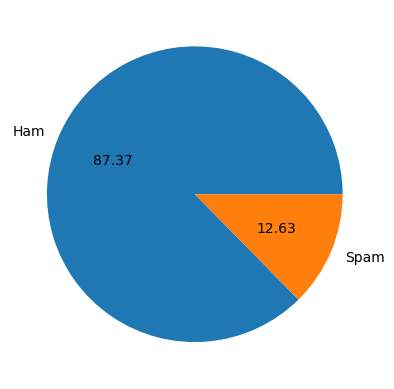

In [15]:
#Data Visualization
plt.pie(ds['v1'].value_counts(), labels=['Ham','Spam'], autopct='%0.2f')
plt.show()

In [16]:
#Model Preparation
x = ds['v2']
y = ds['v1']

In [17]:
# Spliting the Dataset for Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [18]:
vt = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train = vt.fit_transform(x_train)
X_test = vt.transform(x_test)
vt.get_feature_names_out()

array(['00', '000', '000pes', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

In [20]:
#Logistic Regression Model
Logistic_Regression_Model = LogisticRegression()
Logistic_Regression_Model = Logistic_Regression_Model.fit(X_train,y_train)

In [21]:
# Predict Train Dataset 
trained = Logistic_Regression_Model.predict(X_train)
accuracy_score(y_train,trained)

0.9593698175787728

In [22]:
tested = Logistic_Regression_Model.predict(X_test)
accuracy_score(y_test,tested)

0.9548678272082527

In [23]:
report = classification_report(y_test,tested, target_names=['Spam', 'Ham'])
print(report)

              precision    recall  f1-score   support

        Spam       0.95      1.00      0.97      1331
         Ham       0.99      0.69      0.81       220

    accuracy                           0.95      1551
   macro avg       0.97      0.84      0.89      1551
weighted avg       0.96      0.95      0.95      1551



In [25]:
#Random Forest Classifier Model
Random_Forest_Model = RandomForestClassifier(n_estimators=100)
Random_Forest_Model = Random_Forest_Model.fit(X_train,y_train)

In [26]:
trained = Random_Forest_Model.predict(X_train)
accuracy_score(y_train,trained)

1.0

In [27]:
# Check Classification report
report = classification_report(y_test,tested, target_names=['Spam', 'Ham'])
print(report)

              precision    recall  f1-score   support

        Spam       0.95      1.00      0.97      1331
         Ham       0.99      0.69      0.81       220

    accuracy                           0.95      1551
   macro avg       0.97      0.84      0.89      1551
weighted avg       0.96      0.95      0.95      1551



In [28]:
# Predict the New mail is Ham or Spam Mail Using Random Forest Classifier Model
Mail = "Nah I don't think he goes to usf, he lives around here though"
Mail_Vectorizer = vt.transform([Mail])
Prediction = Random_Forest_Model.predict(Mail_Vectorizer)
# If Prediction is 0 Means Ham and 1 is Spam
if Prediction == 0:
    print('Ham Mail')
elif Prediction == 1:
    print('Spam Mail')

Ham Mail
